*Autores: Alex H. Pfoccori Quispe, Milton A. Mozo Davila*

# Máquinas de vectores de soporte

En este capítulo, analizamos la máquina de vectores de soporte (SVM), un enfoque para la
clasificación que se desarrolló en la comunidad informática en la década de 1990 y que ha ganado
popularidad desde entonces. Se ha demostrado que las SVM funcionan bien en una variedad de
entornos y, a menudo, se las considera uno de los mejores clasificadores "listos para usar".
Usamos la biblioteca e1071 en R para demostrar el clasificador de vectores de soporte y el
SVM. Otra opción es la biblioteca LiblineaR, que es útil para problemas lineales muy grandes.

## Clasificador de vectores de soporte

La biblioteca e1071 contiene implementaciones para varios métodos de aprendizaje
estadístico. En particular, la función svm () se puede usar para ajustar un clasificador de vectores
de soporte svm () cuando se usa el argumento kernel = "linear". Esta función utiliza una
formulación ligeramente diferente de (9.14) y (9.25) para el clasificador de vectores de soporte.
Un argumento de costo nos permite especificar el costo de una violación al margen. Cuando el
argumento del costo es pequeño, los márgenes serán amplios y muchos vectores de soporte
estarán en el margen o violarán el margen. Cuando el argumento del costo es grande, los
márgenes serán estrechos y habrá pocos vectores de soporte en el margen o violando el margen.

Ahora usamos la función svm () para ajustar el clasificador de vectores de soporte para un
valor dado del parámetro de costo. Aquí demostramos el uso de esta función en un ejemplo
bidimensional para que podamos trazar el límite de decisión resultante. Comenzamos generando
las observaciones, que pertenecen a dos clases.

In [1]:
set.seed(1)
x=matrix(rnorm(20*2), ncol=2)
y=c(rep(-1, 10), rep(1, 10))
x[y==1,]=x[y==1,]+1

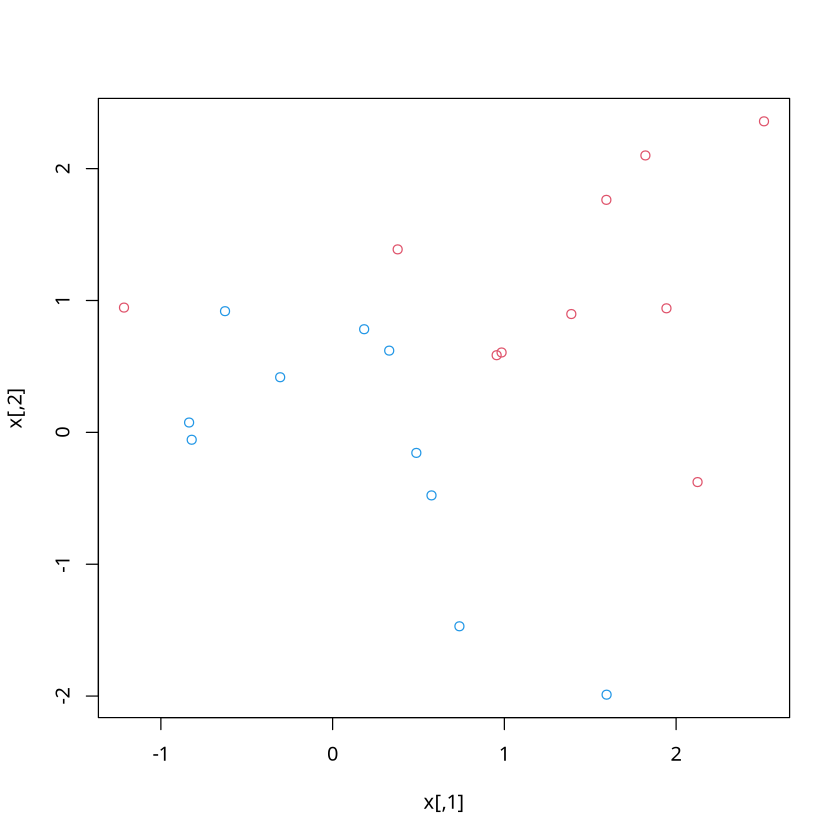

In [2]:
plot(x, col=(3-y))

No son. A continuación, ajustamos el clasificador de vectores de soporte. Tenga en cuenta
que para que la función svm () realice la clasificación (a diferencia de la regresión basada en
SVM), debemos codificar la respuesta como una variable de factor. Ahora creamos un marco de
datos con la respuesta codificada como factor.

In [3]:
dat = data.frame(x=x, y=as.factor(y))
library(e1071)
svmfit=svm(y~., data=dat, kernel="linear", cost=10, scale=FALSE)

El argumento scale = FALSE le dice a la función svm () que no escale cada característica para
que tenga una media de cero o una desviación estándar de uno; dependiendo de la aplicación, es
posible que se prefiera utilizar scale = TRUE.
Ahora podemos trazar el clasificador de vectores de soporte obtenido.

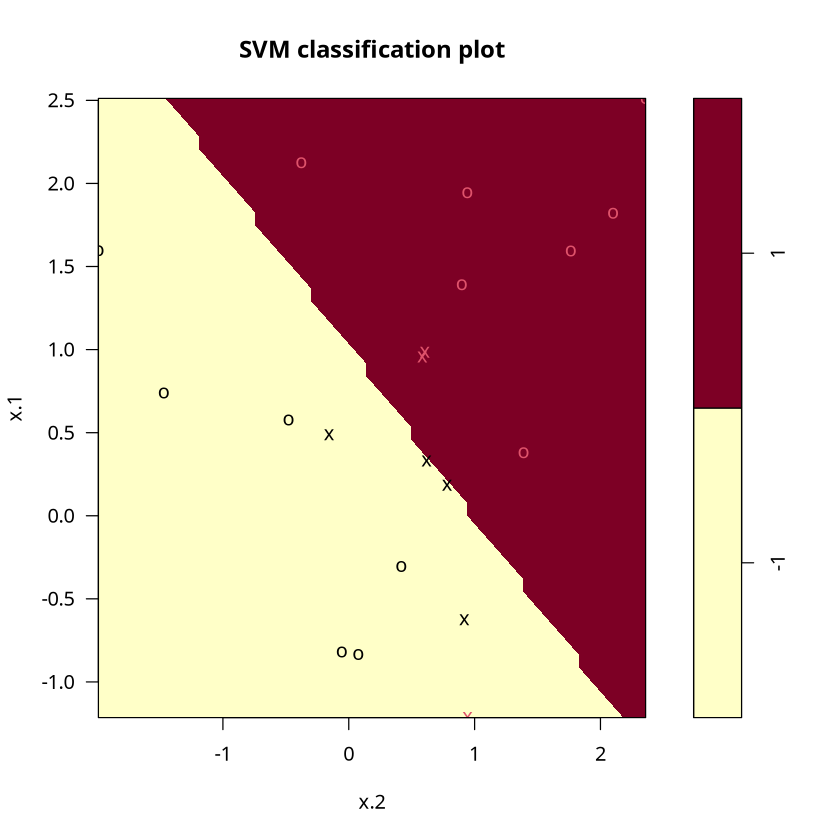

In [4]:
plot(svmfit, dat)

Tenga en cuenta que los dos argumentos de la función plot.svm () son la salida de la llamada
a svm (), así como los datos utilizados en la llamada a svm (). La región del espacio de entidades
que se asignará a la clase -1 se muestra en azul claro y la región que se asignará a la clase +1 se
muestra en violeta. El límite de decisión entre las dos clases es lineal (porque usamos el argumento
kernel = "linear"), aunque debido a la forma en que se implementa la función de trazado en esta
biblioteca, el límite de decisión parece algo irregular en el gráfico. Vemos que en este caso solo
una observación está mal clasificada. (Tenga en cuenta que aquí la segunda característica se traza
en el eje xy la primera característica se traza en el eje y, en contraste con el comportamiento de la
función plot () habitual en R.) Los vectores de apoyo se trazan como cruces y las observaciones
restantes se trazan como círculos; vemos aquí que hay siete vectores de soporte. Podemos
determinar sus identidades de la siguiente manera:

In [5]:
svmfit$index

[1]  1  2  5  7 14 16 17

Podemos obtener información básica sobre el ajuste del clasificador de vectores de soporte
usando el comando summary ()

In [6]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




Esto nos dice, por ejemplo, que se usó un kernel lineal con costo = 10, y que había siete
vectores de soporte, cuatro en una clase y tres en la otra.

¿Qué pasa si usamos un valor menor del parámetro de costo?

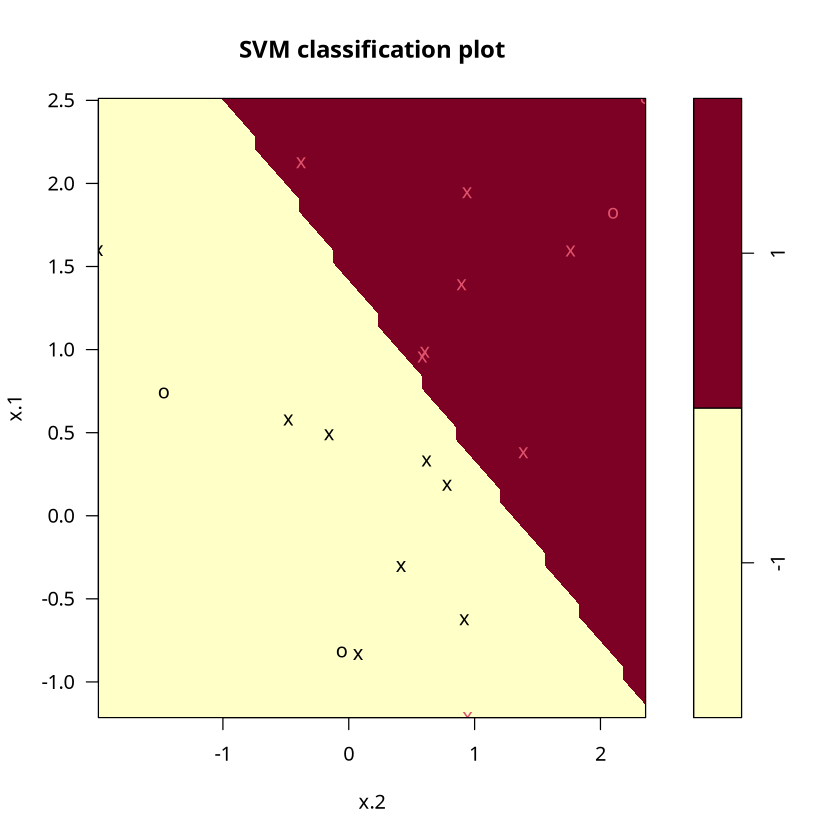

In [7]:
svmfit=svm(y~., data=dat, kernel="linear", cost=0.1, scale=FALSE)
plot(svmfit, dat)

In [8]:
svmfit$index

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

Ahora que se está utilizando un valor menor del parámetro de costo, obtenemos un número
mayor de vectores de soporte, porque el margen ahora es más amplio. Desafortunadamente, la
función svm () no genera explícitamente los coeficientes del límite de decisión lineal obtenido
cuando el clasificador de vectores de soporte se ajusta, ni genera el con del margen.

La biblioteca e1071 incluye una función incorporada, tune (), para realizar la validación cross-
tune (). De forma predeterminada, tune () realiza una validación cruzada diez veces mayor en un conjunto de modelos de interés. Para utilizar esta función, pasamos información relevante sobre el
conjunto de modelos que se están considerando. El siguiente comando indica que queremos
comparar SVM con un kernel lineal, usando un rango de valores del parámetro de costo

In [9]:
set.seed(1)
tune.out=tune(svm, y~., data=dat, kernel="linear", ranges=list(cost=c(0.001, 0.01, 0.1, 1, 5, 10, 100)))

Podemos acceder fácilmente a los errores de validación cruzada para cada uno de estos
modelos usando el comando summary ():

In [10]:
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.55  0.4377975
2 1e-02  0.55  0.4377975
3 1e-01  0.05  0.1581139
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


Vemos que el costo = 0.1 da como resultado la tasa de error de validación cruzada más baja.
La función tune () almacena el mejor modelo obtenido, al que se puede acceder de la siguiente
manera:

In [11]:
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




La función predict () se puede usar para predecir la etiqueta de clase en un conjunto de
observaciones de prueba, en cualquier valor dado del parámetro de costo. Comenzamos generando
un conjunto de datos de prueba.

In [12]:
xtest=matrix(rnorm(20*2), ncol=2)
ytest=sample(c(-1, 1), 20, rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,]+1
testdat=data.frame(x=xtest, y=as.factor(ytest))

Ahora predecimos las etiquetas de clase de estas observaciones de prueba. Aquí utilizamos el
mejor modelo obtenido mediante validación cruzada para hacer predicciones.

In [13]:
ypred=predict(bestmod, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1 1
     -1  9 1
     1   2 8

Así, con este valor de costo, 19 de las observaciones de prueba están correctamente
clasificadas. ¿Qué pasaría si hubiéramos utilizado costo = 0.01?

In [14]:
svmfit=svm(y~., data=dat, kernel="linear", cost=.01, scale=FALSE)
ypred=predict(svmfit, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  6
     1   0  3

En este caso, una observación adicional está mal clasificada.
Ahora considere una situación en la que las dos clases son linealmente separables. Entonces
podemos encontrar un hiperplano de separación usando la función svm (). Primero separamos aún
más las dos clases en nuestros datos simulados para que sean linealmente separables:

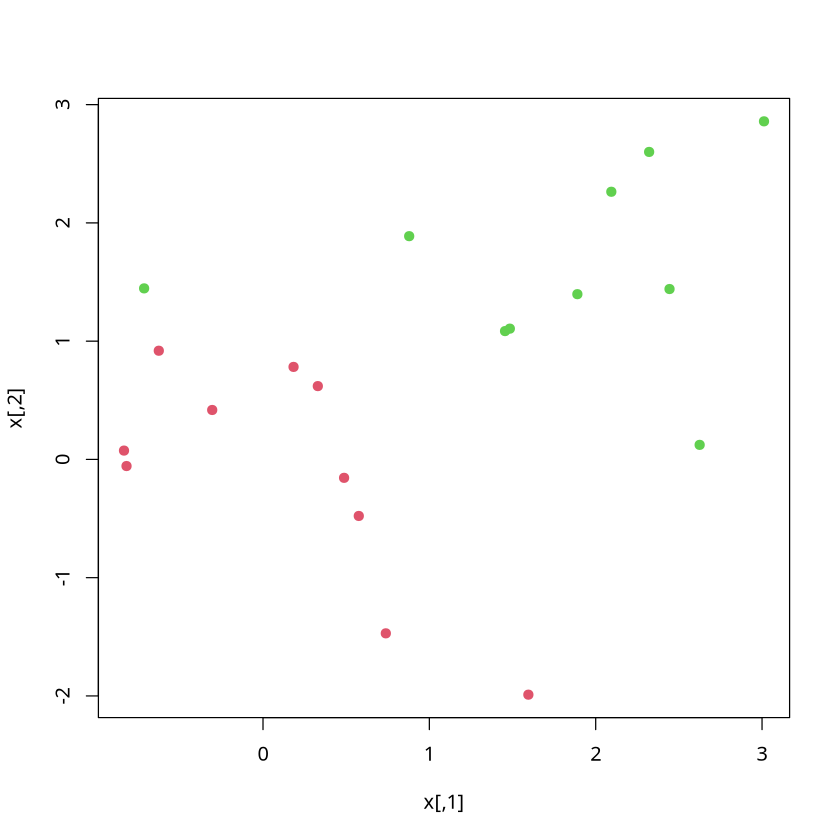

In [15]:
x[y==1,] = x[y==1,] + 0.5
plot(x, col=(y+5)/2, pch=19)

Ahora las observaciones son apenas separables linealmente. Ajustamos el clasificador de
vectores de soporte y graficamos el hiperplano resultante, utilizando un valor de costo muy grande
para que ninguna observación se clasifique erróneamente.

In [16]:
dat=data.frame(x=x, y=as.factor(y))
svmfit=svm(y~., data=dat, kernel="linear", cost=1e5)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




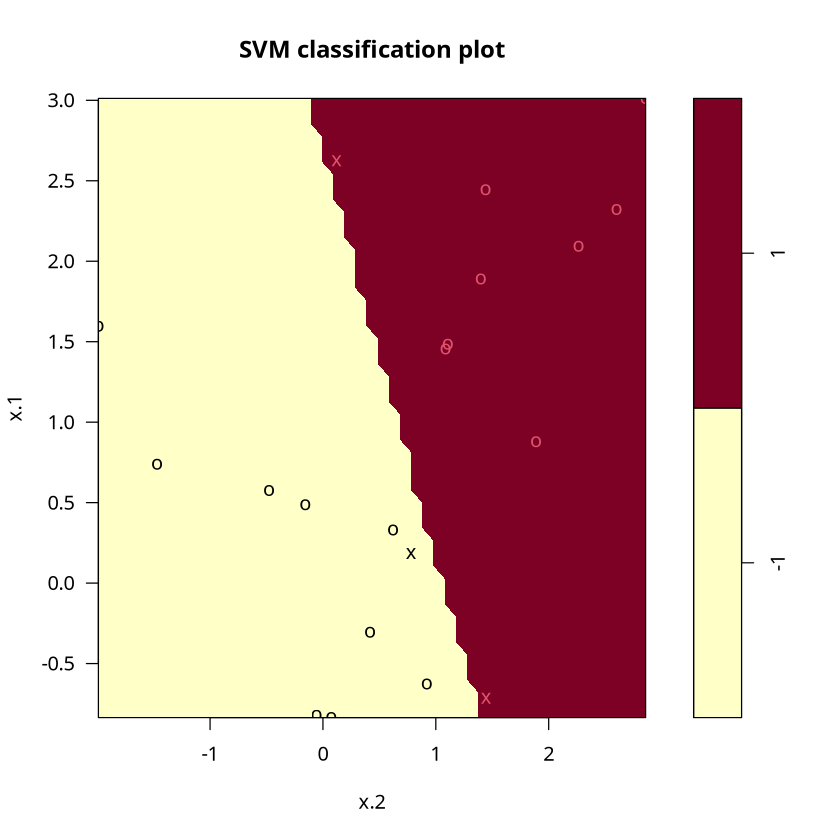

In [17]:
plot(svmfit, dat)

No se cometieron errores de entrenamiento y solo se utilizaron tres vectores de soporte. Sin
embargo, podemos ver en la figura que el margen es muy estrecho (porque las observaciones que
no son vectores de apoyo, indicadas como círculos, están muy cerca del límite de decisión). Parece
probable que este modelo tenga un rendimiento deficiente en los datos de prueba. Ahora probamos
con un valor de costo menor:

In [18]:
svmfit=svm(y~., data=dat, kernel="linear", cost=1)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




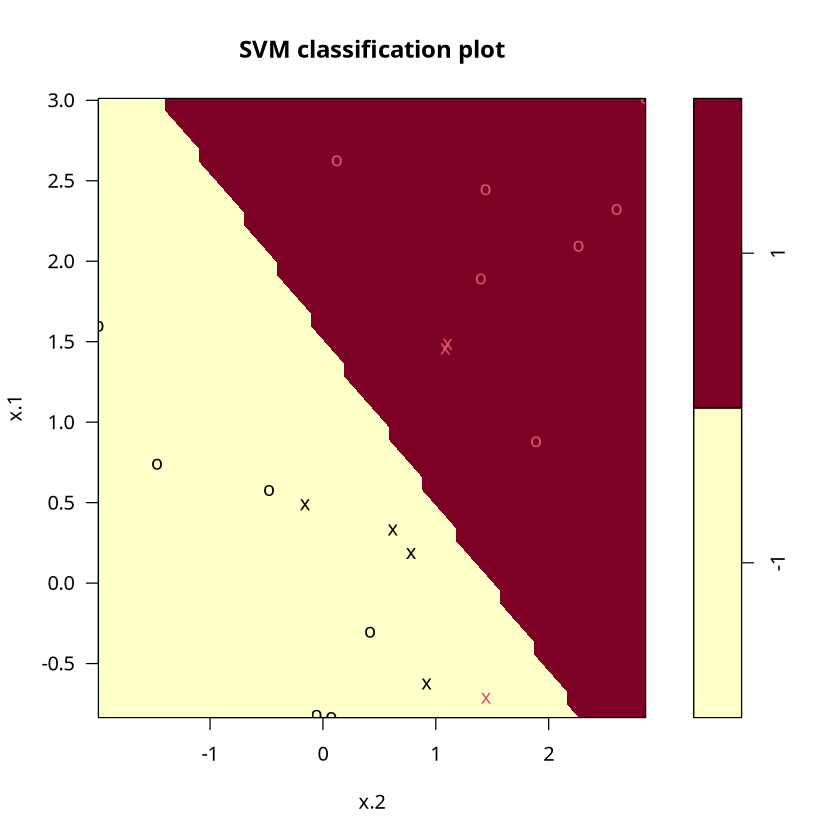

In [19]:
plot(svmfit, dat)

Usando costo = 1, clasificamos erróneamente una observación de entrenamiento, pero también
obtenemos un margen mucho más amplio y utilizamos siete vectores de soporte. Parece probable
que este modelo funcione mejor en datos de prueba que el modelo con costo = 1e5.

## Máquinas de vectores soporte

Para ajustar una SVM usando un kernel no lineal, nuevamente usamos la función svm (). Sin
embargo, ahora usamos un valor diferente del parámetro kernel. Para ajustar una SVM con un
kernel polinomial usamos kernel = "polyinomial", y para ajustar una SVM con un kernel radial
usamos kernel = "radial". En el primer caso también usamos el argumento de grado para especificar
un grado para el núcleo polinomial (esto es d en (9.22)), y en el último caso usamos gamma para
especificar un valor de γ para el núcleo de base radial (9.24).

Primero generamos algunos datos con un límite de clase no lineal, de la siguiente manera:

In [20]:
set.seed(1)
x=matrix(rnorm(200*2), ncol=2)
x[1:100,]=x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(1,150), rep(2,50))
dat=data.frame(x=x, y=as.factor(y))

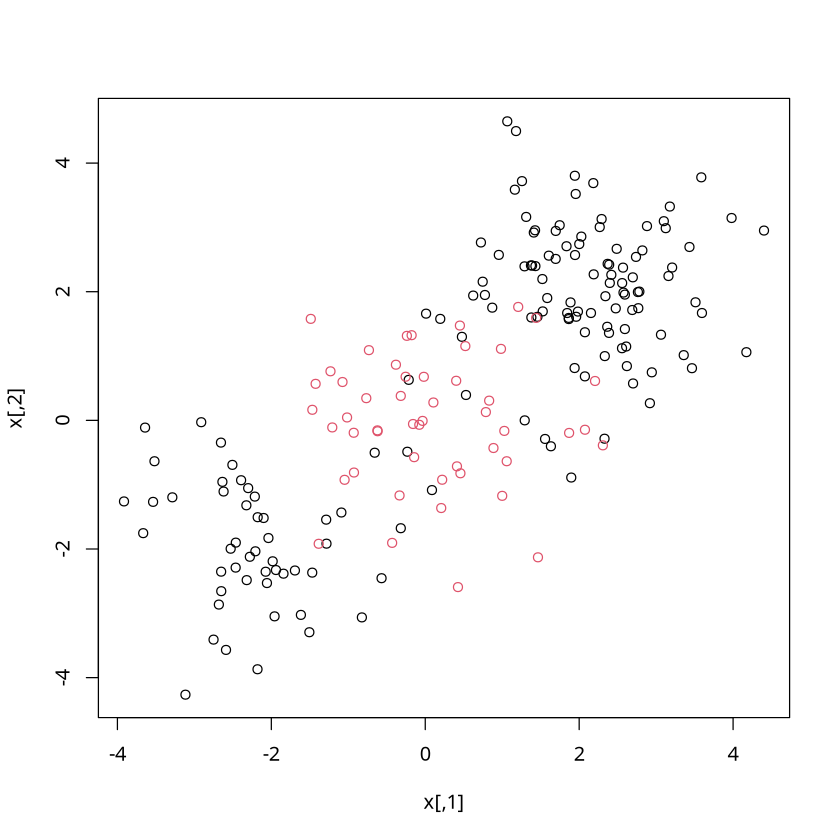

In [21]:
plot(x, col=y)

Los datos se dividen aleatoriamente en grupos de entrenamiento y prueba. Luego ajustamos los
datos de entrenamiento usando la función svm () con un kernel radial y γ = 1:

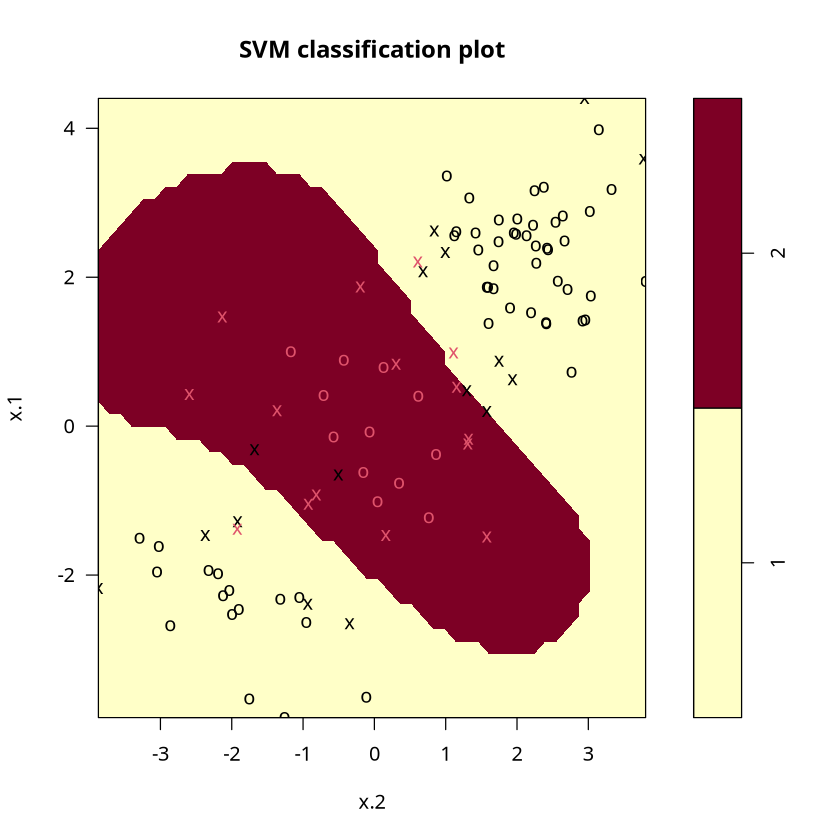

In [22]:
train=sample(200,100)
svmfit=svm(y~., data=dat[train,], kernel="radial", gamma=1, cost=1)
plot(svmfit, dat[train,])

El gráfico muestra que la SVM resultante tiene un límite decididamente no lineal. La función
summary () se puede utilizar para obtener información sobre el ajuste de SVM:

In [23]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  31

 ( 16 15 )


Number of Classes:  2 

Levels: 
 1 2




Podemos ver en la figura que hay un buen número de errores de entrenamiento en este ajuste
de SVM. Si aumentamos el valor del costo, podemos reducir el número de errores de
entrenamiento. Sin embargo, esto tiene el precio de un límite de decisión más irregular que parece
correr el riesgo de sobreajustar los datos.

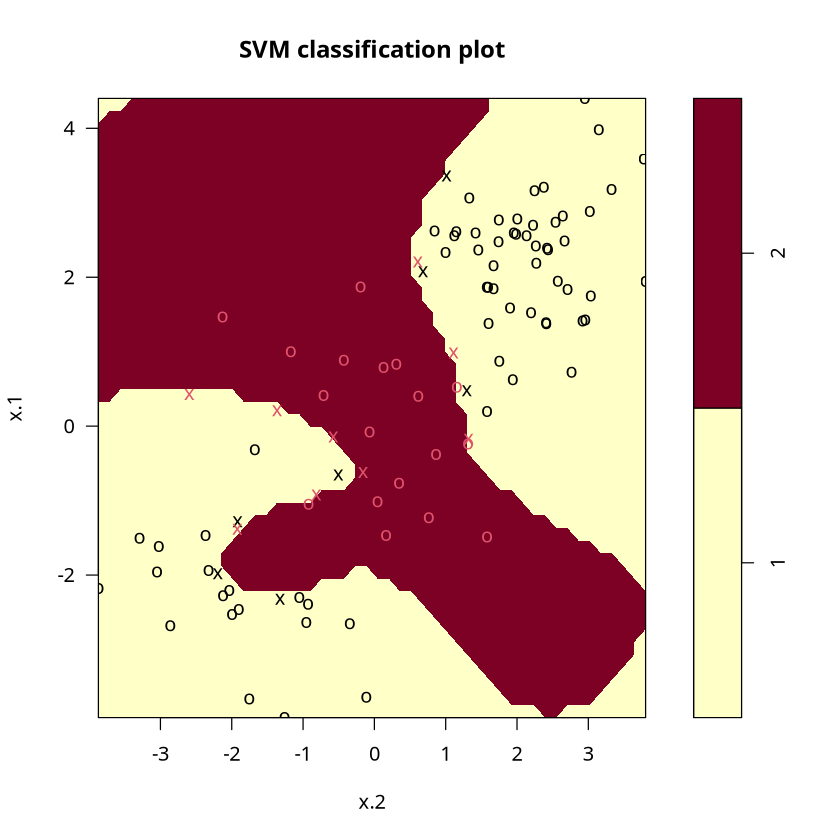

In [24]:
svmfit=svm(y~., data=dat[train,], kernel="radial", gamma=1, cost=1e5)
plot(svmfit, dat[train,])

Podemos realizar una validación cruzada usando tune () para seleccionar la mejor opción de γ
y costo para una SVM con un kernel radial:

In [25]:
set.seed(1)
tune.out=tune(svm, y~., data=dat[train,], kernel="radial", ranges=list(cost=c(0.1, 1, 10, 100, 1000), gamma=c(0.5, 1, 2, 3, 4)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.07 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.26 0.15776213
2  1e+00   0.5  0.07 0.08232726
3  1e+01   0.5  0.07 0.08232726
4  1e+02   0.5  0.14 0.15055453
5  1e+03   0.5  0.11 0.07378648
6  1e-01   1.0  0.22 0.16193277
7  1e+00   1.0  0.07 0.08232726
8  1e+01   1.0  0.09 0.07378648
9  1e+02   1.0  0.12 0.12292726
10 1e+03   1.0  0.11 0.11005049
11 1e-01   2.0  0.27 0.15670212
12 1e+00   2.0  0.07 0.08232726
13 1e+01   2.0  0.11 0.07378648
14 1e+02   2.0  0.12 0.13165612
15 1e+03   2.0  0.16 0.13498971
16 1e-01   3.0  0.27 0.15670212
17 1e+00   3.0  0.07 0.08232726
18 1e+01   3.0  0.08 0.07888106
19 1e+02   3.0  0.13 0.14181365
20 1e+03   3.0  0.15 0.13540064
21 1e-01   4.0  0.27 0.15670212
22 1e+00   4.0  0.07 0.08232726
23 1e+01   4.0  0.09 0.07378648
24 1e+02   4.0  0.13 0.14181365
25 1e+03   4.0  0.15 0

Por lo tanto, la mejor elección de parámetros implica costo = 1 y gamma = 2. Podemos ver las
predicciones del conjunto de prueba para este modelo aplicando la función predict () a los datos.
Observe que para hacer esto, subconjuntamos el dat del marco de datos usando -train como un
conjunto de índices.

In [26]:
table(true=dat[-train, "y"], pred=predict(tune.out$best.model, newx=dat[-train,]))

    pred
true  1  2
   1 54 23
   2 17  6

## Curvas ROC

El paquete ROCR se puede utilizar para producir curvas ROC como las de las Figuras 9.10 y
9.11. Primero escribimos una función corta para trazar una curva ROC dado un vector que contiene
una puntuación numérica para cada observación, pred, y un vector que contiene la etiqueta de clase
para cada observación, la verdad.

In [27]:
library(ROCR)
rocplot=function(pred, truth, ...) {
    predob = prediction(pred, truth)
    perf = performance(predob, "tpr", "fpr")
    plot(perf, ...)
}

Las SVM y los clasificadores de vectores de soporte generan etiquetas de clase para cada
observación. Sin embargo, también es posible obtener valores ajustados para cada observación,
que son las puntuaciones numéricas utilizadas para obtener las etiquetas de clase. Por ejemplo, en
el caso de un clasificador de vectores de soporte, el valor ajustado para una observación X = (X1,
X2, ..., Xp) T toma la forma βˆ0 + βˆ1X1 + βˆ2X2 + ... + βˆpXp. Para una SVM con un núcleo no
lineal, la ecuación que produce el valor ajustado se da en (9.23). En esencia, el signo del valor
ajustado determina en qué lado del límite de decisión se encuentra la observación. Por lo tanto, la
relación entre el valor ajustado y la predicción de clase para una observación dada es simple: si el
valor ajustado excede de cero, la observación se asigna a una clase, y si es menor que cero, se asigna a la otra. Para obtener los valores ajustados para un ajuste de modelo SVM dado, usamos
decision.values = TRUE al ajustar svm (). Entonces la función de predicción () generará los valores
ajustados

In [28]:
svmfit.opt=svm(y~., data=dat[train,], kernel="radial", gamma=2, cost=1, decision.values=T)
fitted=attributes(predict(svmfit.opt, dat[train,], decision.values=TRUE))$decision.values

Ahora podemos producir la gráfica ROC

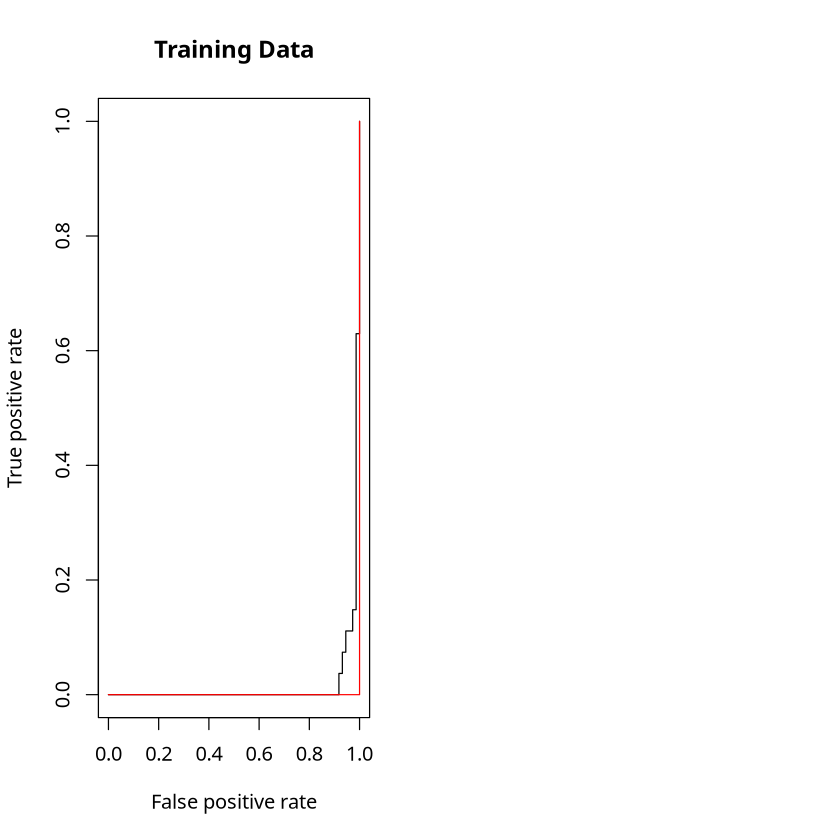

In [29]:
par(mfrow=c(1,2))
rocplot(fitted, dat[train, "y"], main="Training Data")
svmfit.flex=svm(y~., data=dat[train,], kernel="radial", gamma=50, cost=1, decision.values=T)
fitted=attributes(predict(svmfit.flex, dat[train,], decision.values=T))$decision.values
rocplot(fitted, dat[train,"y"], add=T, col="red")

SVM parece estar produciendo predicciones precisas. Al aumentar γ podemos producir un
ajuste más flexible y generar más mejoras en la precisión.

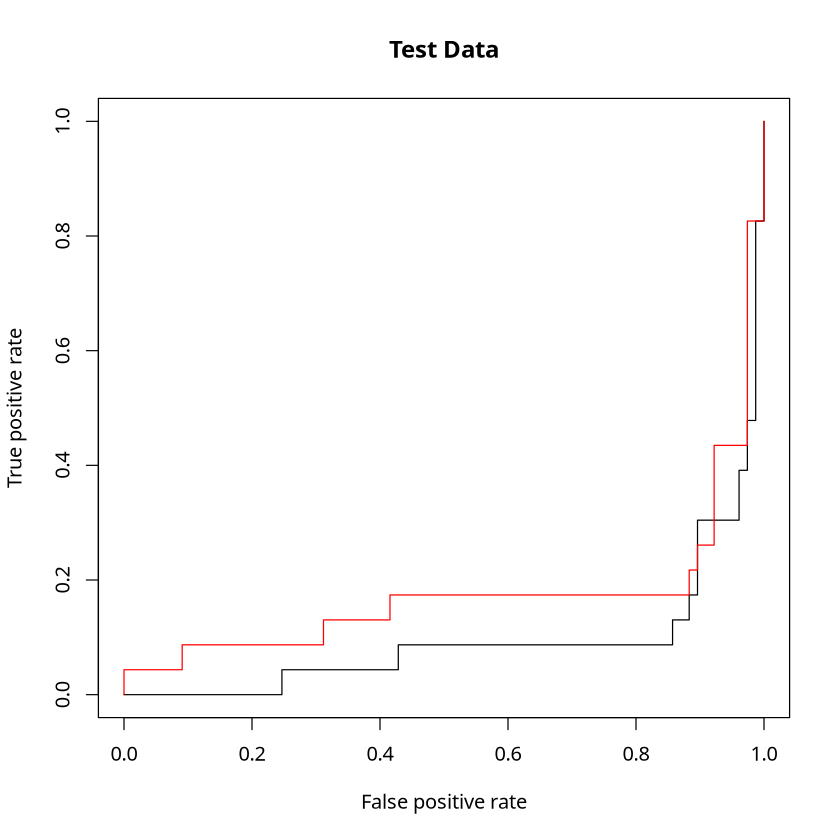

In [30]:
fitted=attributes(predict(svmfit.opt, dat[-train,], decision.values=T))$decision.values
rocplot(fitted, dat[-train, "y"], main="Test Data")
fitted=attributes(predict(svmfit.flex, dat[-train,], decision.values=T))$decision.values
rocplot(fitted, dat[-train, "y"], add=T, col="red")

## SVM con varias clases

Si la respuesta es un factor que contiene más de dos niveles, entonces la función svm () realizará
una clasificación de clases múltiples usando el enfoque uno contra uno. Exploramos ese escenario
aquí generando una tercera clase de observaciones.

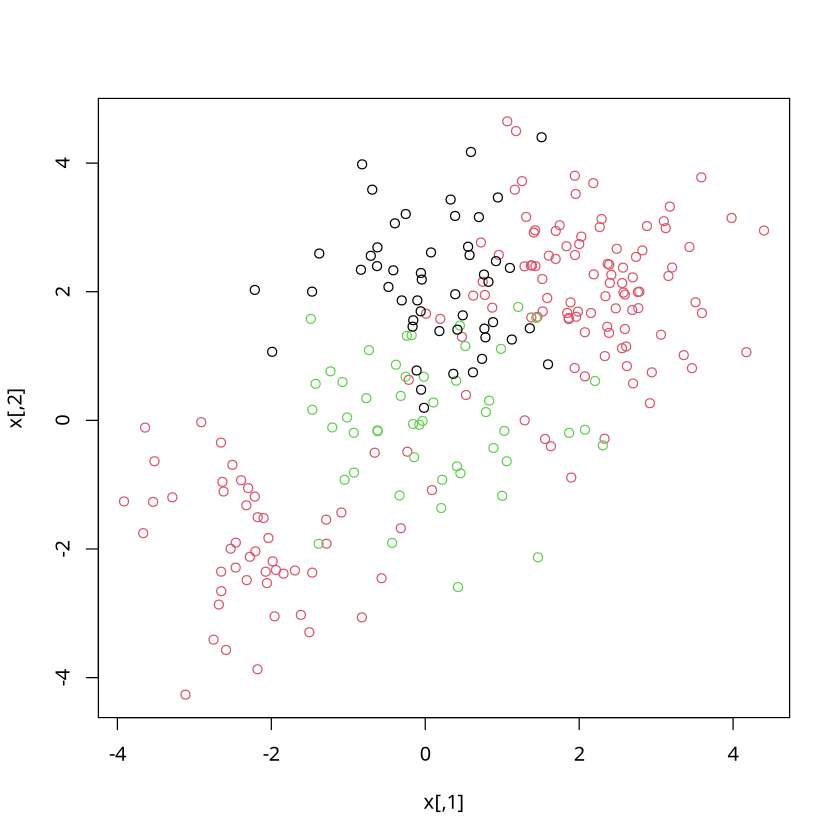

In [31]:
set.seed(1)
x=rbind(x, matrix(rnorm(50*2), ncol=2))
y=c(y, rep(0, 50))
x[y==0, 2]=x[y==0, 2] + 2
dat=data.frame(x=x, y=as.factor(y))
par(mfrow=c(1,1))
plot(x, col=(y+1))

Ahora ajustamos una SVM a los datos:

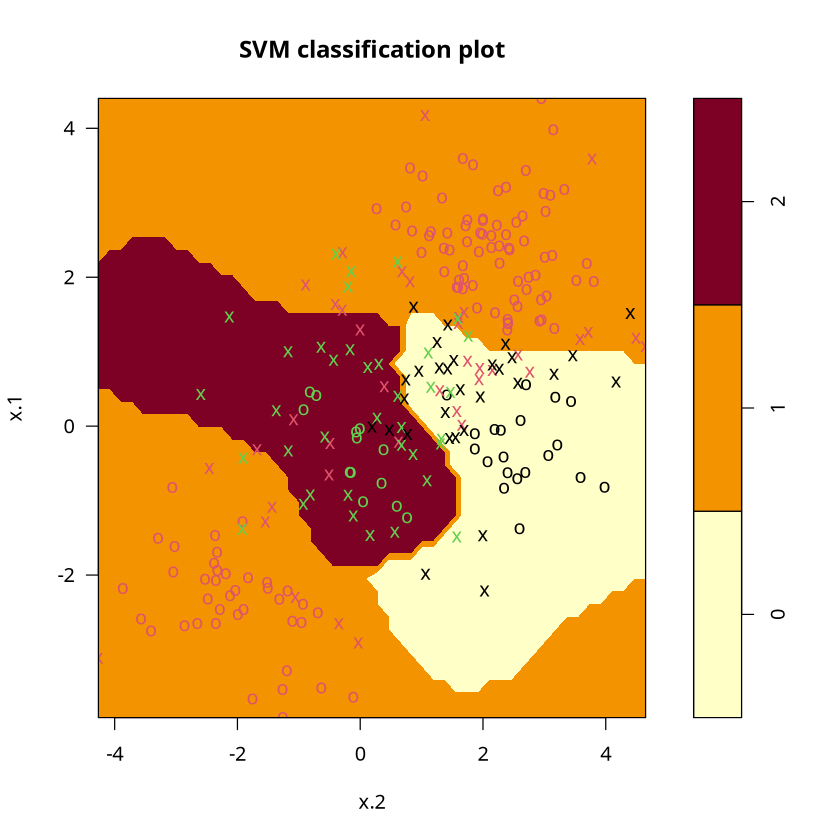

In [32]:
svmfit=svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
plot(svmfit, dat)

La biblioteca e1071 también se puede utilizar para realizar la regresión de vectores de soporte,
si el vector de respuesta que se pasa a svm () es numérico en lugar de un factor

## Aplicación a los datos de expresión genética

Ahora examinamos el conjunto de datos de Khan, que consta de una serie de muestras de tejido
correspondientes a cuatro tipos distintos de pequeños tumores de células redondas azules. Para
cada muestra de tejido, están disponibles las medidas de expresión génica. El conjunto de datos
consta de datos de entrenamiento, xtrain e ytrain, y datos de prueba, xtest e ytest.

Examinamos la dimensión de los datos:

In [33]:
library(ISLR)
names(Khan)

[1] "xtrain" "xtest"  "ytrain" "ytest"

Este conjunto de datos consta de medidas de expresión para 2.308 genes. Los conjuntos de
entrenamiento y prueba constan de 63 y 20 observaciones respectivamente.

In [35]:
dim(Khan$xtrain)

[1]   63 2308

In [36]:
dim(Khan$xtest)

[1]   20 2308

In [37]:
length(Khan$ytrain)

[1] 63

In [38]:
length(Khan$ytest)

[1] 20

In [39]:
table(Khan$ytrain)


 1  2  3  4 
 8 23 12 20 

In [40]:
table(Khan$ytest)


1 2 3 4 
3 6 6 5 

Usaremos un enfoque de vector de soporte para predecir el subtipo de cáncer usando medidas
de expresión génica. En este conjunto de datos, hay una gran cantidad de características en relación
con la cantidad de observaciones. Esto sugiere que deberíamos usar un kernel lineal, porque la
flexibilidad adicional que resultará de usar un kernel polinomial o radial es innecesaria.

In [41]:
dat=data.frame(x=Khan$xtrain, y=as.factor(Khan$ytrain))
out=svm(y~., data=dat, kernel="linear", cost=10)
summary(out)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




In [42]:
table(out$fitted, dat$y)

   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

Vemos que no hay errores de entrenamiento. De hecho, esto no es sorprendente, porque la gran
cantidad de variables en relación con la cantidad de observaciones implica que es fácil encontrar
hiperplanos que separen completamente las clases. Lo que más nos interesa no es el rendimiento
del clasificador de vectores de soporte en las observaciones de entrenamiento, sino su rendimiento
en las observaciones de prueba.

In [43]:
dat.te=data.frame(x=Khan$xtest, y=as.factor(Khan$ytest))
pred.te=predict(out, newdata=dat.te)
table(pred.te, dat.te$y)

       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5